In [23]:
! pip install langgraph

In [24]:
from langgraph.graph import StateGraph, START,END
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
import time

In [25]:
#Step1: Define the State
class Crashstate(TypedDict):
    input: str
    step1: str
    step2: str
    step3: str


In [26]:
#Step2 : Define steps
def step_1(state: Crashstate) -> Crashstate:
    print(" step1 executed")
    return {"step1": "done", "input": state["input"]}

def step_2(state: Crashstate) -> Crashstate:
    print(" step2 hanging .. now manually interrup from the notebook toolbar")
    time.sleep(30)
    return {"step2": "done" }

def step_3(state: Crashstate) -> Crashstate:
    print(" step3 executed")
    return {"step3": "done"}


In [27]:
builder = StateGraph(Crashstate)
builder.add_node("step_1", step_1)
builder.add_node("step_2", step_2)
builder.add_node("step_3", step_3)

builder.add_edge(START, "step_1")
builder.add_edge("step_1", "step_2")
builder.add_edge("step_2", "step_3")
builder.add_edge("step_3", END)

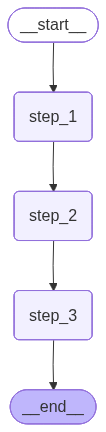

In [29]:
# Step8 : Adding checkpointer
checkpointer = InMemorySaver()

graph = builder.compile(checkpointer=checkpointer)
graph

In [30]:
try:
    print("Runnin the graph, interrup at step_2")
    graph.invoke({"input": "start"}, config = {"configurable": {"thread_id":'thread-1'}})
except KeyboardInterrupt:
    print("manually interruped")

Runnin the graph, interrup at step_2
 step1 executed
 step2 hanging .. now manually interrup from the notebook toolbar
manually interruped


In [31]:
graph.get_state({"configurable":{"thread_id":'thread-1'}})

StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step_2',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f207c-fd8f-653b-8001-7f5bd11d9bbb'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2026-01-15T11:46:21.428050+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f207c-fd8d-620d-8000-b808a75abf0b'}}, tasks=(PregelTask(id='0c13258d-222a-fe82-547f-0adc4ca98b59', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(), state=None, result=None),), interrupts=())

In [32]:
list(graph.get_state_history({"configurable":{"thread_id":'thread-1'}}))

[StateSnapshot(values={'input': 'start', 'step1': 'done'}, next=('step_2',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f207c-fd8f-653b-8001-7f5bd11d9bbb'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2026-01-15T11:46:21.428050+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f207c-fd8d-620d-8000-b808a75abf0b'}}, tasks=(PregelTask(id='0c13258d-222a-fe82-547f-0adc4ca98b59', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'input': 'start'}, next=('step_1',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f207c-fd8d-620d-8000-b808a75abf0b'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2026-01-15T11:46:21.427150+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'ch

In [33]:
final_state = graph.invoke(None, config = {"configurable": {"thread_id":'thread-1'}})
print("final state: ", final_state)

 step2 hanging .. now manually interrup from the notebook toolbar
 step3 executed
final state:  {'input': 'start', 'step1': 'done', 'step2': 'done', 'step3': 'done'}


In [34]:
graph.get_state({"configurable":{"thread_id":'thread-1'}})

StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done', 'step3': 'done'}, next=(), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f207f-9e95-6fc4-8003-0194357a057f'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2026-01-15T11:47:31.999942+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f207f-9e93-6506-8002-78ebceefd00f'}}, tasks=(), interrupts=())

In [35]:
list(graph.get_state_history({"configurable":{"thread_id":'thread-1'}}))

[StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done', 'step3': 'done'}, next=(), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f207f-9e95-6fc4-8003-0194357a057f'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2026-01-15T11:47:31.999942+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f207f-9e93-6506-8002-78ebceefd00f'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'input': 'start', 'step1': 'done', 'step2': 'done'}, next=('step_3',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f207f-9e93-6506-8002-78ebceefd00f'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-15T11:47:31.998848+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0f207c-fd8f-653b-8001-7f5bd11d9bbb'}}, tasks=(PregelTask(id='d83ffe2c-2772-ace7